In [1]:
using Pkg
Pkg.activate("Plots")
#Pkg.add(["Images", "FileIO"])
using Plots
#using Images, FileIO

  Activating new project at `c:\Users\micke\Desktop\COT4501\NumericalNavier\KallynFolder\Plots`


┌ Info: Saved animation to C:\Users\micke\AppData\Local\Temp\jl_XC1kpM3wV2.gif
└ @ Plots C:\Users\micke\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("C:\\Users\\micke\\AppData\\Local\\Temp\\jl_XC1kpM3wV2.gif")
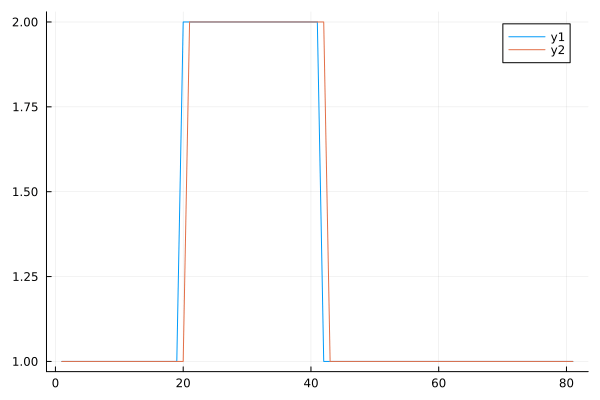

In [2]:
#Linear convection

nx = 81  # try changing this number from 41 to 81 and Run All ... what happens?
dx = 2 / (nx-1)
nt = 25    #nt is the number of timesteps we want to calculate
dt = .025  #dt is the amount of time each timestep covers (delta t)
c = 1      #assume wavespeed of c = 1

u = ones(nx)
u[Int(0.5 / dx):Int(1 / dx + 1)] .= 2  #setting u = 2 between 0.5 and 1 as per our I.C.s

plt = plot(u)

un = ones(nx) #initialize a temporary array

@gif for n=1:nt  #loop for values of n from 0 to nt, so it will run nt times
    un = copy(u) ##copy the existing values of u into un
    for i=2:nx ## you can try commenting this line and...
    #for i in range(nx): ## ... uncommenting this line and see what happens!
        u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])
        
        plot(plt, u)
    end
end

┌ Info: Saved animation to C:\Users\micke\AppData\Local\Temp\jl_5G1mJmFOBS.gif
└ @ Plots C:\Users\micke\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("C:\\Users\\micke\\AppData\\Local\\Temp\\jl_5G1mJmFOBS.gif")
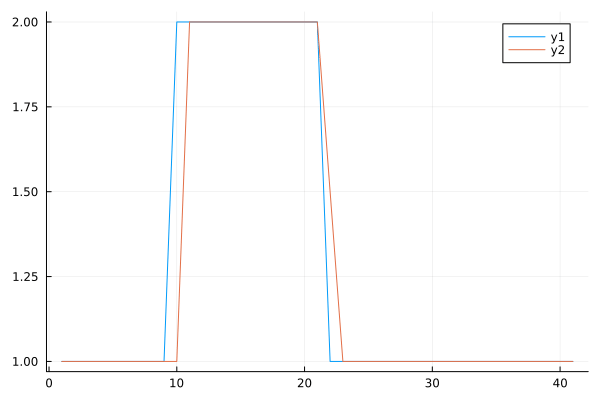

In [3]:
#nonlinear convection

nx = 41  # try changing this number from 41 to 81 and Run All ... what happens?
dx = 2 / (nx-1)
nt = 25    #nt is the number of timesteps we want to calculate
dt = .025  #dt is the amount of time each timestep covers (delta t)
c = 1      #assume wavespeed of c = 1

u = ones(nx)
u[Int(0.5 / dx):Int(1 / dx + 1)] .= 2  #setting u = 2 between 0.5 and 1 as per our I.C.s

plt = plot(u)

un = ones(nx) #initialize a temporary array

@gif for n=1:nt  #loop for values of n from 0 to nt, so it will run nt times
    un = copy(u) ##copy the existing values of u into un
    for i=2:nx ## you can try commenting this line and...
    #for i in range(nx): ## ... uncommenting this line and see what happens!
        u[i] = un[i] - u[i] * dt / dx * (un[i] - un[i-1])
        
        plot(plt, u)
    end
end

In [ ]:
nx = 41
dx = 2 / (nx - 1)
nt = 20    #the number of timesteps we want to calculate
ν = 0.3   #the value of viscosity
σ = 0.2 #sigma is a parameter, we'll learn more about it later
dt = σ * dx^2 / ν #dt is defined using sigma ... more later!


u = ones(nx)      #a numpy array with nx elements all equal to 1.
u[Int(0.5 / dx):Int(1 / dx + 1)] .= 2   #setting u = 2 between 0.5 and 1 as per our I.C.s

un = ones(nx) #our placeholder array, un, to advance the solution in time

plt = plot(u)

@gif for n=1:nt  #iterate through time
    un = copy(u) ##copy the existing values of u into un
    for i=2:(nx - 1)
        u[i] = un[i] + ν * dt / dx^2 * (un[i+1] - 2 * un[i] + un[i-1])
        plot(plt, u)
    end
end

In [ ]:
nx = 101
nt = 100
dx = 2 * π / (nx - 1)
nu = .07
dt = dx * nu

x = 0:(2*π/nx):2π
un = zeros(nx)
t = 0

ufunc(t, x, nu) = -2*nu*(-(-8*t + 2*x)*exp(-(-4*t + x)^2/(4*nu*(t + 1)))/(4*nu*(t + 1)) - (-8*t + 2*x - 4*pi)*exp(-(-4*t + x - 2*pi)^2/(4*nu*(t + 1)))/(4*nu*(t + 1)))/(exp(-(-4*t + x - 2*pi)^2/(4*nu*(t + 1))) + exp(-(-4*t + x)^2/(4*nu*(t + 1)))) + 4

u = [ufunc(t, x0, nu) for x0=x]
plot(x, u, xlimits=[0, 2π], ylimits=[0, 10])

In [ ]:
u = [ufunc(t, x0, nu) for x0=x]

@gif for n=1:nt
    un = copy(u)
    for i=2:nx
        u[i] = un[i] - un[i] * dt / dx *(un[i] - un[i-1]) + nu * dt / dx^2 * (un[i+1] - 2 * un[i] + un[i-1])
    end
    u[1] = un[1] - un[1] * dt / dx * (un[1] - un[end-1]) + nu * dt / dx^2 * (un[2] - 2 * un[1] + un[end-1])
    u[end] = u[1]
    u_analytical = [ufunc(n * dt, xi, nu) for xi in x]

    plot(x, u, xlimits=[0, 2π], ylimits=[0, 10])
    plot!(x, u_analytical)
end
        

In [ ]:
###variable declarations
nx = 81
ny = 81
nt = 100
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .2
dt = sigma * dx

@show Int.([0x00, 0x11, 0xFF])

x = 0:2/(nx-1):2
y = 0:2/(ny-1):2

u = ones(ny, nx) ##create a 1xn vector of 1's
un = ones(ny, nx) ##

###Assign initial conditions

##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
u[Int(.5 / dy):Int(1 / dy + 1),Int(.5 / dx):Int(1 / dx + 1)] .= 2 



###Plot Initial Condition
##the figsize parameter can be used to produce different sized images
heatmap(x, y, u, color=cgrad([:lightblue,:red]), clim=(1,2))

In [ ]:
u = ones(ny, nx)
u[Int(.5 / dy):Int(1 / dy + 1), Int(.5 / dx):Int(1 / dx + 1)] .= 2

@gif for n=1:nt + 1
    un = copy(u)
    row, col = size(u)
    for j=2:row
        for i=2:col
            u[j, i] = (un[j, i] - (c * dt / dx * (un[j, i] - un[j, i - 1])) - (c * dt / dy * (un[j, i] - un[j - 1, i])))
        end
    end
            
    u[1, :] .= 1
    u[end, :] .= 1
    u[:, 1] .= 1
    u[:, end] .= 1
    #heatmap(x, y, u, color=cgrad([:lightblue,:white,:red]), clim=(1,2))
    plot(x, y, u, st=:surface, color=cgrad([:black,:white]), zlimits=[0.99, 2.01])
end

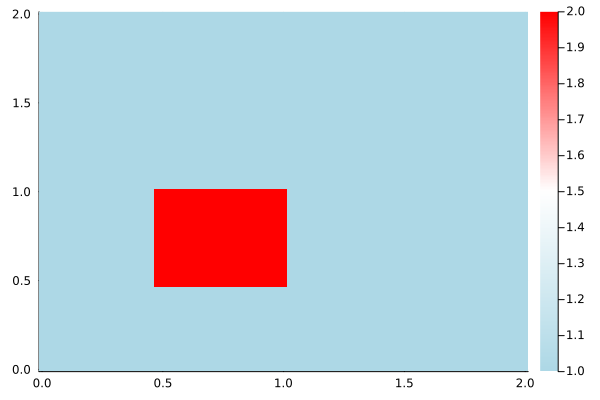

In [36]:
###variable declarations
nx = 81
ny = 81
nt = 80
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .2
dt = sigma * dx

x = 0:2/(nx-1):2
y = 0:2/(ny-1):2

u = ones(ny, nx) ##create a 1xn vector of 1's
v = ones(ny, nx)
un = ones(ny, nx)
vn = ones(ny, nx)

###Assign initial conditions
##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
u[Int(.5 / dy):Int(1 / dy + 1), Int(.5 / dx):Int(1 / dx + 1)] .= 2;
##set hat function I.C. : v(.5<=x<=1 && .5<=y<=1 ) is 2
v[Int(.5 / dy):Int(1 / dy + 1), Int(.5 / dx):Int(1 / dx + 1)] .= 2;

heatmap(x, y, u, color=cgrad([:lightblue,:white,:red]), clim=(1,2))

┌ Info: Saved animation to C:\Users\micke\AppData\Local\Temp\jl_ta1IdozWNu.gif
└ @ Plots C:\Users\micke\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("C:\\Users\\micke\\AppData\\Local\\Temp\\jl_ta1IdozWNu.gif")
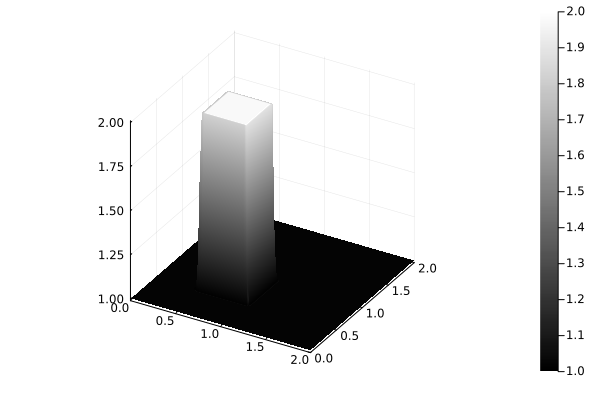

In [37]:
u = ones(ny, nx) ##create a 1xn vector of 1's
v = ones(ny, nx)
un = ones(ny, nx)
vn = ones(ny, nx)

u[Int(.5 / dy):Int(1 / dy + 1), Int(.5 / dx):Int(1 / dx + 1)] .= 2;
v[Int(.5 / dy):Int(1 / dy + 1), Int(.5 / dx):Int(1 / dx + 1)] .= 2;

@gif for n=1:nt + 1 ##loop across number of time steps
    un = copy(u)
    vn = copy(v)
    
    u[2:end, 2:end] = un[2:end, 2:end] - (un[2:end, 2:end] .* c .* dt ./ dx .* (un[2:end, 2:end] - un[2:end, 1:end-1])) - vn[2:end, 2:end] .* c .* dt ./ dy .* (un[2:end, 2:end] - un[1:end-1, 2:end])

    v[2:end, 2:end] = vn[2:end, 2:end] - (un[2:end, 2:end] .* c .* dt ./ dx .* (vn[2:end, 2:end] - vn[2:end, 1:end-1])) - vn[2:end, 2:end] .* c .* dt ./ dy .* (vn[2:end, 2:end] - vn[1:end-1, 2:end])
    
    u[1, :] .= 1
    u[end, :] .= 1
    u[:, 1] .= 1
    u[:, end] .= 1
    
    v[1, :] .= 1
    v[end, :] .= 1
    v[:, 1] .= 1
    v[:, end] .= 1

    plot(x, y, [u, v], st=:surface, color=cgrad([:black,:white]), zlimits=[0.99, 2.01])
end

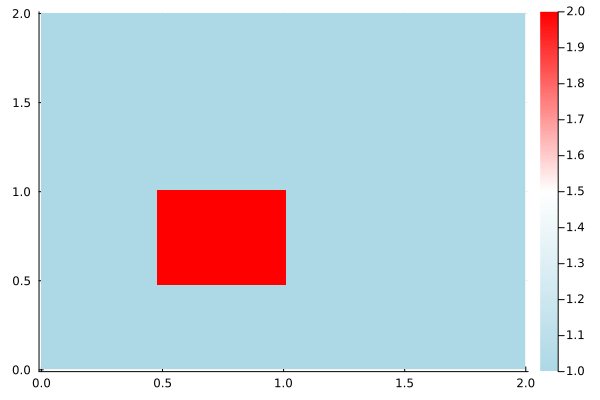

In [12]:
###variable declarations
nx = 101
ny = 101
nt = 17
nu = .05
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .25
dt = sigma * dx * dy / nu

x = 0:2/nx:2
y = 0:2/ny:2

u = ones(ny, nx)  # create a 1xn vector of 1's
un = ones(ny, nx)

###Assign initial conditions
# set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
u[Int(.5 / dy):Int(1 / dy + 1),Int(.5 / dx):Int(1 / dx + 1)] .= 2;
heatmap(x, y, u, color=cgrad([:lightblue,:white,:red]))

In [13]:
function diffuse(nt)
    u[Int(.5 / dy):Int(1 / dy + 1), Int(.5 / dx):Int(1 / dx + 1)] .= 2

    @gif for n in 1:nt+1
        un = copy(u)
        u[2:end-1, 2:end-1] = un[2:end-1, 2:end-1] +
                              nu * dt / dx^2 *
                              (un[2:end-1, 3:end] - 2 * un[2:end-1, 2:end-1] + un[2:end-1, 1:end-2]) +
                              nu * dt / dy^2 *
                              (un[3:end, 2:end-1] - 2 * un[2:end-1, 2:end-1] + un[1:end-2, 2:end-1])
        u[1, :] .= 1
        u[end, :] .= 1
        u[:, 1] .= 1
        u[:, end] .= 1
        heatmap(x, y, u, color=cgrad([:lightblue,:white,:red]), clim=(1,2))
    end
end


diffuse (generic function with 1 method)

┌ Info: Saved animation to C:\Users\micke\AppData\Local\Temp\jl_pKHiHKTazY.gif
└ @ Plots C:\Users\micke\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("C:\\Users\\micke\\AppData\\Local\\Temp\\jl_pKHiHKTazY.gif")
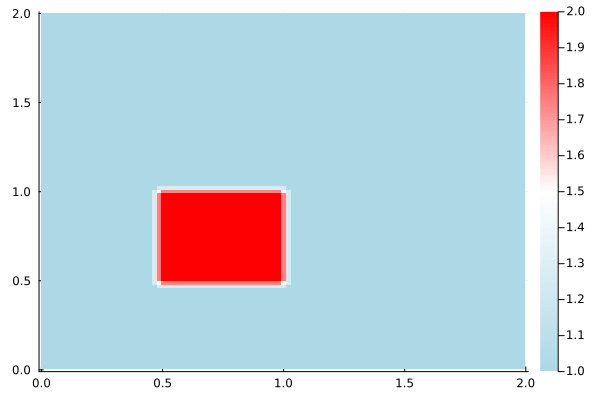

In [14]:
diffuse(75)

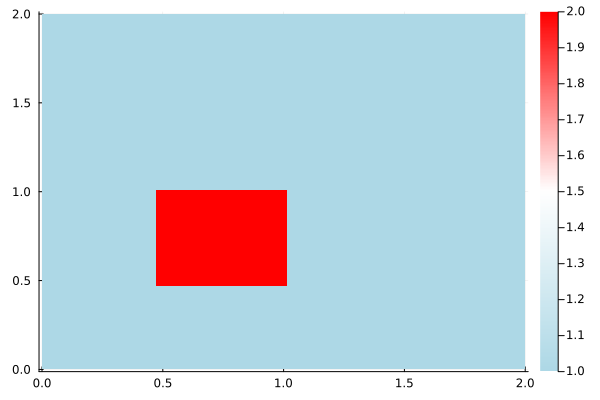

In [15]:
###variable declarations
nx = 81
ny = 81
nt = 120
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .0009
nu = 0.01
dt = sigma * dx * dy / nu


x = 0:2/nx:2
y = 0:2/ny:2

u = ones(ny, nx)  # create a 1xn vector of 1's
v = ones(ny, nx)
un = ones(ny, nx) 
vn = ones(ny, nx)
comb = ones(ny, nx)

###Assign initial conditions

##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
u[Int(.5 / dy):Int(1 / dy + 1),Int(.5 / dx):Int(1 / dx + 1)] .= 2;
##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
v[Int(.5 / dy):Int(1 / dy + 1),Int(.5 / dx):Int(1 / dx + 1)] .= 2;

heatmap(x, y, u, color=cgrad([:lightblue,:white,:red]), clim=(1,2))

┌ Info: Saved animation to C:\Users\micke\AppData\Local\Temp\jl_fGPu7edaZm.gif
└ @ Plots C:\Users\micke\.julia\packages\Plots\HyyIK\src\animation.jl:156


Plots.AnimatedGif("C:\\Users\\micke\\AppData\\Local\\Temp\\jl_fGPu7edaZm.gif")
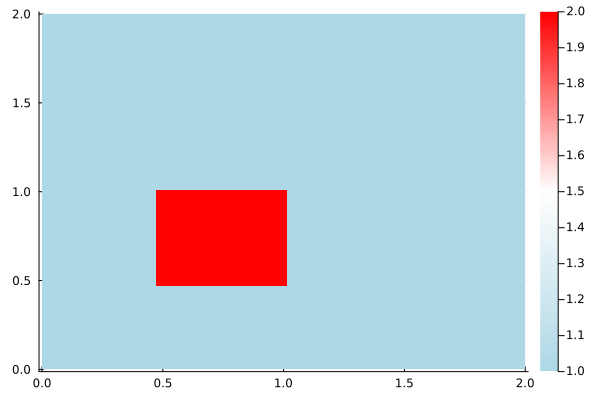

In [16]:
@gif for n in 1:nt+1
    un = copy(u)
    vn = copy(v)
    u[2:end-1, 2:end-1] = (un[2:end-1, 2:end-1] -
                           dt / dx .* un[2:end-1, 2:end-1] .* 
                           (un[2:end-1, 2:end-1] - un[2:end-1, 1:end-2]) - 
                           dt / dy .* vn[2:end-1, 2:end-1] .* 
                           (un[2:end-1, 2:end-1] - un[1:end-2, 2:end-1]) + 
                           nu * dt / dx^2 .* 
                           (un[2:end-1, 3:end] - 2 .* un[2:end-1, 2:end-1] + un[2:end-1, 1:end-2]) + 
                           nu * dt / dy^2 .* 
                           (un[3:end, 2:end-1] - 2 .* un[2:end-1, 2:end-1] + un[1:end-2, 2:end-1]))
    
    v[2:end-1, 2:end-1] = (vn[2:end-1, 2:end-1] - 
                           dt / dx .* un[2:end-1, 2:end-1] .* 
                           (vn[2:end-1, 2:end-1] - vn[2:end-1, 1:end-2]) -
                           dt / dy .* vn[2:end-1, 2:end-1] .* 
                           (vn[2:end-1, 2:end-1] - vn[1:end-2, 2:end-1]) + 
                           nu * dt / dx^2 .* 
                           (vn[2:end-1, 3:end] - 2 .* vn[2:end-1, 2:end-1] + vn[2:end-1, 1:end-2]) +
                           nu * dt / dy^2 .* 
                           (vn[3:end, 2:end-1] - 2 .* vn[2:end-1, 2:end-1] + vn[1:end-2, 2:end-1]))
    
    u[1, :] .= 1
    u[end, :] .= 1
    u[:, 1] .= 1
    u[:, end] .= 1
    
    v[1, :] .= 1
    v[end, :] .= 1
    v[:, 1] .= 1
    v[:, end] .= 1

    heatmap(x, y, u, color=cgrad([:lightblue,:white,:red]), clim=(1,2))
end
